<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Talleres/2_Reduccion_de_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Taller 2: Reducción de dimensión con PCA y tSNE

En este taller se aplicarán técnicas de reducción de dimensión para visualización de datos. Se utilizará una base de datos bastante utilizada en los cursos de Machine Learning llamada MNIST.


Importamos las librerías necesarias


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.datasets import fetch_openml

Descargamos la base da datos


In [25]:
mnist = fetch_openml("mnist_784", version=1)  # descargar mnist desde sklearn
mnist.target = mnist.target.astype(np.uint8)  # etiquetas objetivo (clases)

X = mnist["data"]
y = mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [26]:
X = X.to_numpy() / 255

(20, 784)


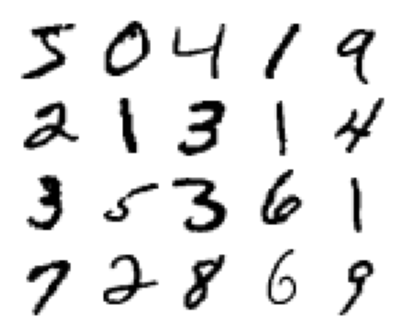

In [27]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")


plt.figure(figsize=(7, 4))
plt.subplot(111)
plot_digits(X[0:20, :])

En este ejemplo seleccionaré al azar dos columnas y 1000 muestras para hacer una gráfica. De esta forma generaré una matriz de 1000x2 para graficar en un espacio 2d. Su tarea es hacer reducción de dimensión para generar el espacio 2d utilizando PCA y tSNE. Dado que la base de datos es demasiado grande, el tiempo de cómputo de los métodos de reducción y de las gráficas puede ser alto. Les recomiendo seleccionar de forma aleatoria y estratificada 1000 muestras para hacer el ejercicio.


In [28]:
# graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z, images, img_w=28, img_h=28, zoom=0.5, cmap="jet"):
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(Z.shape[0]):
        # print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i, 0], Z[i, 1]), xycoords="data", frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i, 0], Z[i, 1])])
        ax.autoscale()

In [29]:
ind_rows = np.random.randint(X.shape[0], size=1000)
ind_cols = np.array([128, 130])
Z = X[ind_rows, :]
Z = Z[:, ind_cols]
print(Z.shape)

(1000, 2)


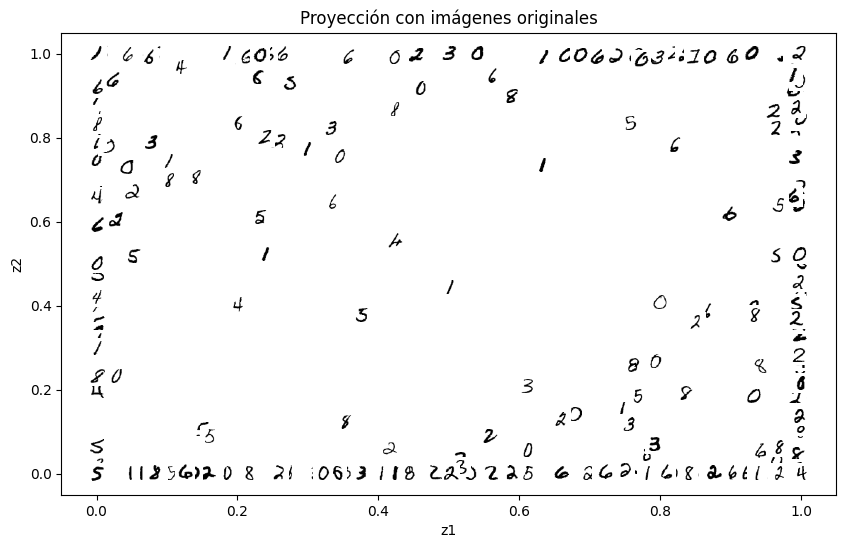

In [30]:
plot_mnist_2d(Z, X[ind_rows, :], img_w=28, img_h=28, zoom=0.5, cmap="binary")
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Proyección con imágenes originales")
plt.show()

In [31]:
X.shape

(70000, 784)

In [32]:
# Selección estratificada de 1000 muestras
X_train, _, y_train, _ = train_test_split(
    X, y, train_size=1000, stratify=y, random_state=42
)

In [33]:
# PCA para reducción de dimensión
Zpca = PCA(n_components=2)
Zpca = Zpca.fit_transform(X_train)

# tSNE para reducción de dimensión
tsne = TSNE(n_components=2, random_state=42)
Ztsne = tsne.fit_transform(X_train)

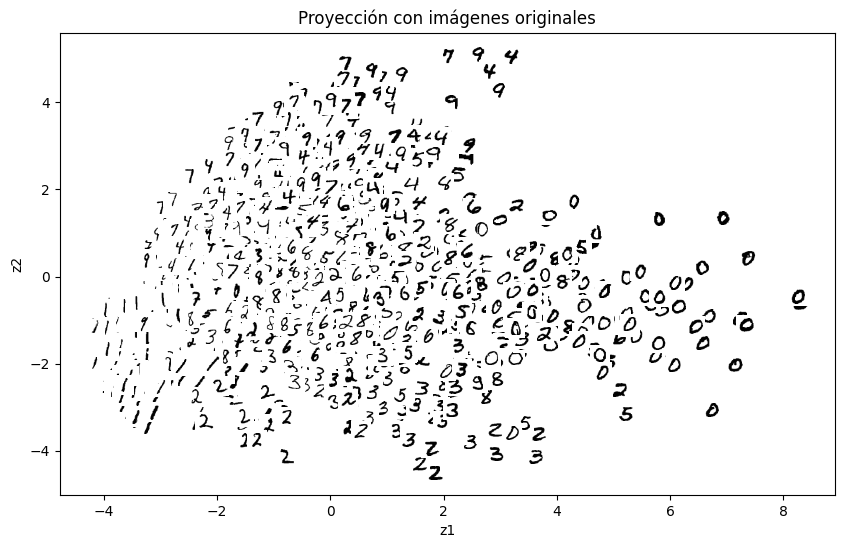

In [34]:
# Visualización Zpca
plot_mnist_2d(Zpca, X_train, img_w=28, img_h=28, zoom=0.5, cmap="binary")
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Proyección con imágenes originales")
plt.show()

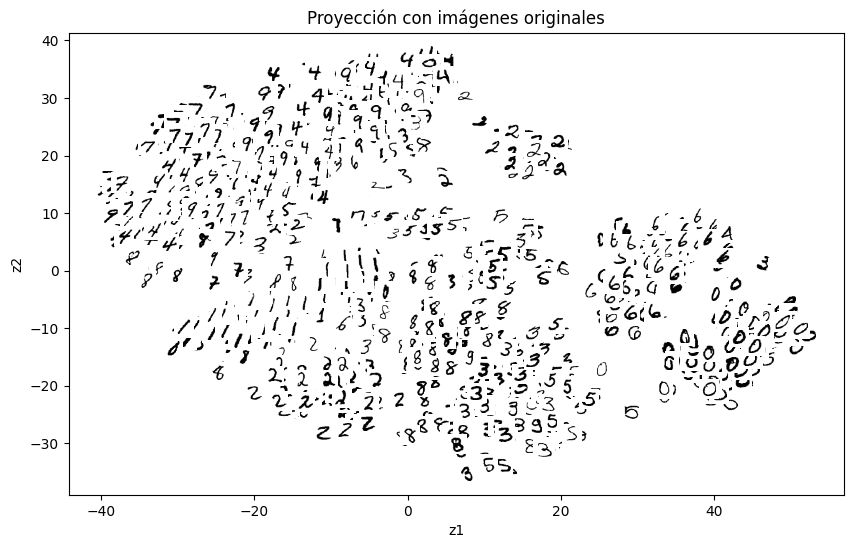

In [35]:
# Visualización tSNE
plot_mnist_2d(Ztsne, X_train, img_w=28, img_h=28, zoom=0.5, cmap="binary")
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Proyección con imágenes originales")
plt.show()